In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/jaeyeon/Desktop/위험지수예측모델/data/세종시사고.csv')
df.head() #5행의 데이터 확인

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,여,74세,상해없음,보행자,남,58세,중상
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,69세,상해없음,승용,여,26세,경상
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,기타 - 기타,승합,남,43세,상해없음,보행자,여,55세,경상
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,49세,상해없음,승합,남,59세,상해없음
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,23세,상해없음,보행자,여,81세,경상


In [3]:
sum = []
for i in range(len(df)):
    sum.append(1.0000 * df['사망자수'][i] + 0.1168 * df['중상자수'][i]+ 0.0068 * df['경상자수'][i]+ 0.0033 *df['부상신고자수'][i])
df['사상자합계'] = sum

In [4]:
df.tail()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,교차로 - 교차로부근,승용,남,58세,상해없음,승용,남,56세,경상,0.1304
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,단일로 - 기타,승용,남,58세,상해없음,승용,남,56세,경상,0.0136
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,교차로 - 교차로부근,개인형이동수단(PM),남,17세,부상신고,보행자,남,15세,경상,0.0101
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,30세,경상,승용,여,51세,경상,0.0136
931,2022123100100137,2022년 12월 31일 09시,토요일,세종특별자치시 해밀동,경상사고,0,0,2,0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,24세,경상,승용,남,33세,경상,0.0136


In [5]:
df.drop_duplicates(['사고번호'])

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,여,74세,상해없음,보행자,남,58세,중상,0.1168
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,승용,남,69세,상해없음,승용,여,26세,경상,0.0068
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,승합,남,43세,상해없음,보행자,여,55세,경상,0.0068
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,승용,남,49세,상해없음,승합,남,59세,상해없음,0.0068
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,단일로 - 기타,승용,남,23세,상해없음,보행자,여,81세,경상,0.0068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,교차로 - 교차로부근,승용,남,58세,상해없음,승용,남,56세,경상,0.1304
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,단일로 - 기타,승용,남,58세,상해없음,승용,남,56세,경상,0.0136
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,교차로 - 교차로부근,개인형이동수단(PM),남,17세,부상신고,보행자,남,15세,경상,0.0101
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,교차로 - 교차로안,이륜,남,30세,경상,승용,여,51세,경상,0.0136


In [6]:
df.to_csv('사상자환산계수.csv',index=False)

In [7]:
date_split = df["사고일시"].str.split(" ")

In [8]:
df["year"] = date_split.str.get(0)
df["month"] = date_split.str.get(1)
df["day"] = date_split.str.get(2)
df["hour"] = date_split.str.get(3)

In [9]:
df

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계,year,month,day,hour
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,상해없음,보행자,남,58세,중상,0.1168,2022년,1월,2일,17시
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,상해없음,승용,여,26세,경상,0.0068,2022년,1월,3일,07시
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,상해없음,보행자,여,55세,경상,0.0068,2022년,1월,3일,14시
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,상해없음,승합,남,59세,상해없음,0.0068,2022년,1월,5일,21시
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,상해없음,보행자,여,81세,경상,0.0068,2022년,1월,5일,22시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,상해없음,승용,남,56세,경상,0.1304,2022년,12월,30일,00시
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,상해없음,승용,남,56세,경상,0.0136,2022년,12월,30일,00시
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,부상신고,보행자,남,15세,경상,0.0101,2022년,12월,30일,16시
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,경상,승용,여,51세,경상,0.0136,2022년,12월,30일,22시


In [10]:
df["year"]=df["year"].str[:-1]

In [11]:
df

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계,year,month,day,hour
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,상해없음,보행자,남,58세,중상,0.1168,2022,1월,2일,17시
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,상해없음,승용,여,26세,경상,0.0068,2022,1월,3일,07시
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,상해없음,보행자,여,55세,경상,0.0068,2022,1월,3일,14시
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,상해없음,승합,남,59세,상해없음,0.0068,2022,1월,5일,21시
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,상해없음,보행자,여,81세,경상,0.0068,2022,1월,5일,22시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,상해없음,승용,남,56세,경상,0.1304,2022,12월,30일,00시
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,상해없음,승용,남,56세,경상,0.0136,2022,12월,30일,00시
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,부상신고,보행자,남,15세,경상,0.0101,2022,12월,30일,16시
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,경상,승용,여,51세,경상,0.0136,2022,12월,30일,22시


In [12]:
df["month"]=df["month"].str[:-1]
df["day"]=df["day"].str[:-1]
df["hour"]=df["hour"].str[:-1]

In [13]:
df

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계,year,month,day,hour
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,상해없음,보행자,남,58세,중상,0.1168,2022,1,2,17
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,상해없음,승용,여,26세,경상,0.0068,2022,1,3,07
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,상해없음,보행자,여,55세,경상,0.0068,2022,1,3,14
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,상해없음,승합,남,59세,상해없음,0.0068,2022,1,5,21
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,상해없음,보행자,여,81세,경상,0.0068,2022,1,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,상해없음,승용,남,56세,경상,0.1304,2022,12,30,00
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,상해없음,승용,남,56세,경상,0.0136,2022,12,30,00
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,부상신고,보행자,남,15세,경상,0.0101,2022,12,30,16
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,경상,승용,여,51세,경상,0.0136,2022,12,30,22


In [14]:
df['일시'] = df['year']+ "-" +df['month']+ "-" +df['day']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사고번호        932 non-null    int64  
 1   사고일시        932 non-null    object 
 2   요일          932 non-null    object 
 3   시군구         932 non-null    object 
 4   사고내용        932 non-null    object 
 5   사망자수        932 non-null    int64  
 6   중상자수        932 non-null    int64  
 7   경상자수        932 non-null    int64  
 8   부상신고자수      932 non-null    int64  
 9   사고유형        932 non-null    object 
 10  법규위반        932 non-null    object 
 11  노면상태        932 non-null    object 
 12  기상상태        932 non-null    object 
 13  도로형태        932 non-null    object 
 14  가해운전자 차종    932 non-null    object 
 15  가해운전자 성별    932 non-null    object 
 16  가해운전자 연령    932 non-null    object 
 17  가해운전자 상해정도  932 non-null    object 
 18  피해운전자 차종    891 non-null    object 
 19  피해운전자 성별    891 non-null    o

In [16]:
df['일시'] = pd.to_datetime(df['일시'],format='%Y-%m-%d')
df

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사상자합계,year,month,day,hour,일시
0,2022010200100246,2022년 1월 2일 17시,일요일,세종특별자치시 조치원읍,중상사고,0,1,0,0,차대사람 - 횡단중,...,보행자,남,58세,중상,0.1168,2022,1,2,17,2022-01-02
1,2022010300100081,2022년 1월 3일 07시,월요일,세종특별자치시 어진동,경상사고,0,0,1,0,차대차 - 기타,...,승용,여,26세,경상,0.0068,2022,1,3,07,2022-01-03
2,2022010300100318,2022년 1월 3일 14시,월요일,세종특별자치시 아름동,경상사고,0,0,1,0,차대사람 - 기타,...,보행자,여,55세,경상,0.0068,2022,1,3,14,2022-01-03
3,2022010500100442,2022년 1월 5일 21시,수요일,세종특별자치시 한솔동,경상사고,0,0,1,0,차대차 - 기타,...,승합,남,59세,상해없음,0.0068,2022,1,5,21,2022-01-05
4,2022010500100459,2022년 1월 5일 22시,수요일,세종특별자치시 조치원읍,경상사고,0,0,1,0,차대사람 - 기타,...,보행자,여,81세,경상,0.0068,2022,1,5,22,2022-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,2022123000100016,2022년 12월 30일 00시,금요일,세종특별자치시 조치원읍,중상사고,0,1,2,0,차대차 - 기타,...,승용,남,56세,경상,0.1304,2022,12,30,00,2022-12-30
928,2022123000100017,2022년 12월 30일 00시,금요일,세종특별자치시 금남면,경상사고,0,0,2,0,차대차 - 추돌,...,승용,남,56세,경상,0.0136,2022,12,30,00,2022-12-30
929,2022123000100415,2022년 12월 30일 16시,금요일,세종특별자치시 아름동,경상사고,0,0,1,1,차대사람 - 횡단중,...,보행자,남,15세,경상,0.0101,2022,12,30,16,2022-12-30
930,2022123000100675,2022년 12월 30일 22시,금요일,세종특별자치시 소담동,경상사고,0,0,2,0,차대차 - 측면충돌,...,승용,여,51세,경상,0.0136,2022,12,30,22,2022-12-30


In [17]:
df['일시'].isnull().sum()

0

In [18]:
df_result = df['일시'].value_counts()

In [108]:
df_result = df_result.reset_index()
df_result

,index,일시,count
0,0,2022-09-07,9
1,1,2022-08-19,8
2,2,2022-06-01,8
3,3,2022-10-19,8
4,4,2022-10-18,8
...,...,...,...
332,332,2022-06-12,1
333,333,2022-06-27,1
334,334,2022-07-02,1
335,335,2022-07-06,1


In [20]:
df_result2 = df.groupby('일시').sum('사상자합계')
df_result2 = df_result2.reset_index()
df_result2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      337 non-null    datetime64[ns]
 1   사고번호    337 non-null    int64         
 2   사망자수    337 non-null    int64         
 3   중상자수    337 non-null    int64         
 4   경상자수    337 non-null    int64         
 5   부상신고자수  337 non-null    int64         
 6   사상자합계   337 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 18.6 KB


In [21]:
df_result2.drop(['사고번호'],axis=1)

,일시,사망자수,중상자수,경상자수,부상신고자수,사상자합계
0,2022-01-02,0,1,0,0,0.1168
1,2022-01-03,0,0,2,0,0.0136
2,2022-01-05,0,0,2,0,0.0136
3,2022-01-06,0,1,0,0,0.1168
4,2022-01-07,0,0,1,1,0.0101
...,...,...,...,...,...,...
332,2022-12-27,0,0,0,3,0.0099
333,2022-12-28,0,2,2,1,0.2505
334,2022-12-29,0,1,2,0,0.1304
335,2022-12-30,0,1,7,1,0.1677


In [22]:
result = pd.merge(df_result,df_result2,how='outer')

In [23]:
result = result.sort_values('일시')

In [24]:
result

,일시,count,사고번호,사망자수,중상자수,경상자수,부상신고자수,사상자합계
264,2022-01-02,1,2022010200100246,0,1,0,0,0.1168
248,2022-01-03,2,4044020600200399,0,0,2,0,0.0136
172,2022-01-05,2,4044021000200901,0,0,2,0,0.0136
286,2022-01-06,1,2022010600100104,0,1,0,0,0.1168
169,2022-01-07,2,4044021400201103,0,0,1,1,0.0101
...,...,...,...,...,...,...,...,...
151,2022-12-27,3,6066368100301205,0,0,0,3,0.0099
38,2022-12-28,5,10110614000501640,0,2,2,1,0.2505
163,2022-12-29,2,4044245800200715,0,1,2,0,0.1304
73,2022-12-30,4,8088492000401123,0,1,7,1,0.1677


In [25]:
result.to_csv('data_count.csv',index=True, encoding="utf-8-sig")

In [26]:
w = pd.read_csv('/Users/jaeyeon/Desktop/위험지수예측모델/data/weather.csv',encoding='cp949')

In [27]:
w.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),평균 풍속(m/s),평균 증기압(hPa),평균 현지기압(hPa),일 최심적설(cm)
0,239,세종,2022-01-01,-5.1,-10.7,0.7,NaN,0.5,2.2,1019.7,NaN
1,239,세종,2022-01-02,-1.4,-8.0,6.3,NaN,1.0,3.3,1015.6,NaN
2,239,세종,2022-01-03,-2.1,-8.0,3.5,NaN,0.7,3.3,1015.2,NaN
3,239,세종,2022-01-04,-0.4,-4.7,4.5,NaN,1.5,2.7,1016.5,NaN
4,239,세종,2022-01-05,-2.6,-7.0,1.5,NaN,0.5,2.6,1016.0,NaN


In [28]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       363 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최고기온(°C)       364 non-null    float64
 6   1시간 최다강수량(mm)  67 non-null     float64
 7   평균 풍속(m/s)     365 non-null    float64
 8   평균 증기압(hPa)    363 non-null    float64
 9   평균 현지기압(hPa)   363 non-null    float64
 10  일 최심적설(cm)     0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 31.5+ KB


In [29]:
w['일시'] = pd.to_datetime(w['일시'],format='%Y-%m-%d')
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             365 non-null    int64         
 1   지점명            365 non-null    object        
 2   일시             365 non-null    datetime64[ns]
 3   평균기온(°C)       363 non-null    float64       
 4   최저기온(°C)       365 non-null    float64       
 5   최고기온(°C)       364 non-null    float64       
 6   1시간 최다강수량(mm)  67 non-null     float64       
 7   평균 풍속(m/s)     365 non-null    float64       
 8   평균 증기압(hPa)    363 non-null    float64       
 9   평균 현지기압(hPa)   363 non-null    float64       
 10  일 최심적설(cm)     0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 31.5+ KB


In [30]:
data = pd.merge(result,w,how='outer')

In [31]:
data = data.drop(['지점','지점명'],axis=1)

In [32]:
data

,일시,count,사고번호,사망자수,중상자수,경상자수,부상신고자수,사상자합계,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),평균 풍속(m/s),평균 증기압(hPa),평균 현지기압(hPa),일 최심적설(cm)
0,2022-01-02,1.0,2.022010e+15,0.0,1.0,0.0,0.0,0.1168,-1.4,-8.0,6.3,NaN,1.0,3.3,1015.6,NaN
1,2022-01-03,2.0,4.044021e+15,0.0,0.0,2.0,0.0,0.0136,-2.1,-8.0,3.5,NaN,0.7,3.3,1015.2,NaN
2,2022-01-05,2.0,4.044021e+15,0.0,0.0,2.0,0.0,0.0136,-2.6,-7.0,1.5,NaN,0.5,2.6,1016.0,NaN
3,2022-01-06,1.0,2.022011e+15,0.0,1.0,0.0,0.0,0.1168,-1.2,-6.7,5.0,NaN,0.9,2.6,1017.5,NaN
4,2022-01-07,2.0,4.044021e+15,0.0,0.0,1.0,1.0,0.0101,-2.0,-7.8,5.2,NaN,0.4,2.7,1018.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.3,7.5,15.3,NaN,2.5,7.1,1009.2,NaN
361,2022-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,4.6,19.0,NaN,0.8,7.6,1010.3,NaN
362,2022-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.4,16.9,NaN,0.5,6.9,1012.7,NaN
363,2022-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.9,-13.8,-5.0,NaN,1.0,1.8,1012.5,NaN


In [33]:
data = data.fillna(0)

In [34]:
data

,일시,count,사고번호,사망자수,중상자수,경상자수,부상신고자수,사상자합계,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),평균 풍속(m/s),평균 증기압(hPa),평균 현지기압(hPa),일 최심적설(cm)
0,2022-01-02,1.0,2.022010e+15,0.0,1.0,0.0,0.0,0.1168,-1.4,-8.0,6.3,0.0,1.0,3.3,1015.6,0.0
1,2022-01-03,2.0,4.044021e+15,0.0,0.0,2.0,0.0,0.0136,-2.1,-8.0,3.5,0.0,0.7,3.3,1015.2,0.0
2,2022-01-05,2.0,4.044021e+15,0.0,0.0,2.0,0.0,0.0136,-2.6,-7.0,1.5,0.0,0.5,2.6,1016.0,0.0
3,2022-01-06,1.0,2.022011e+15,0.0,1.0,0.0,0.0,0.1168,-1.2,-6.7,5.0,0.0,0.9,2.6,1017.5,0.0
4,2022-01-07,2.0,4.044021e+15,0.0,0.0,1.0,1.0,0.0101,-2.0,-7.8,5.2,0.0,0.4,2.7,1018.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-10-17,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0000,12.3,7.5,15.3,0.0,2.5,7.1,1009.2,0.0
361,2022-11-02,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0000,10.0,4.6,19.0,0.0,0.8,7.6,1010.3,0.0
362,2022-11-07,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0000,9.3,2.4,16.9,0.0,0.5,6.9,1012.7,0.0
363,2022-12-18,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0000,-8.9,-13.8,-5.0,0.0,1.0,1.8,1012.5,0.0


In [35]:
data = data.sort_values('일시')

In [36]:
data.sort_values('사상자합계').tail()

,일시,count,사고번호,사망자수,중상자수,경상자수,부상신고자수,사상자합계,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),평균 풍속(m/s),평균 증기압(hPa),평균 현지기압(hPa),일 최심적설(cm)
97,2022-04-20,5.0,1.011021e+16,1.0,2.0,2.0,2.0,1.2538,14.8,6.1,23.0,0.0,1.3,6.2,1005.6,0.0
240,2022-09-19,6.0,1.213255e+16,1.0,2.0,3.0,0.0,1.2540,24.4,18.8,30.3,0.0,3.2,18.9,990.3,0.0
91,2022-04-14,7.0,1.415429e+16,1.0,3.0,3.0,1.0,1.3741,10.3,8.4,14.2,0.5,2.5,9.9,1007.0,0.0
84,2022-04-07,3.0,6.066122e+15,1.0,4.0,4.0,1.0,1.4977,10.7,5.2,18.3,0.8,1.6,5.7,1007.9,0.0
137,2022-06-01,8.0,1.617648e+16,2.0,4.0,1.0,1.0,2.4773,22.0,13.8,30.3,0.0,1.6,8.5,996.0,0.0


In [37]:
data.to_csv('data_result.csv',index=True, encoding="utf-8-sig")

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 337 to 336
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             365 non-null    datetime64[ns]
 1   count          365 non-null    float64       
 2   사고번호           365 non-null    float64       
 3   사망자수           365 non-null    float64       
 4   중상자수           365 non-null    float64       
 5   경상자수           365 non-null    float64       
 6   부상신고자수         365 non-null    float64       
 7   사상자합계          365 non-null    float64       
 8   평균기온(°C)       365 non-null    float64       
 9   최저기온(°C)       365 non-null    float64       
 10  최고기온(°C)       365 non-null    float64       
 11  1시간 최다강수량(mm)  365 non-null    float64       
 12  평균 풍속(m/s)     365 non-null    float64       
 13  평균 증기압(hPa)    365 non-null    float64       
 14  평균 현지기압(hPa)   365 non-null    float64       
 15  일 최심적설(cm)     365 non-nul

In [39]:
# 학습 및 예측
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from sklearn.model_selection import train_test_split

In [50]:
data = data.astype({'count': 'int'})
feature_names = ['1시간 최다강수량(mm)','평균기온(°C)','최저기온(°C)','최고기온(°C)','평균 풍속(m/s)','평균 증기압(hPa)','평균 현지기압(hPa)']
X=data[feature_names]
Y=data['count']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=777)


In [51]:
X_train.head()

,1시간 최다강수량(mm),평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),평균 증기압(hPa),평균 현지기압(hPa)
335,0.0,-1.0,-3.9,3.0,1.0,3.7,1020.9
6,0.0,0.1,-4.9,5.8,0.7,4.0,1009.5
85,0.0,13.2,3.0,22.9,1.2,5.0,1008.5
156,0.0,26.3,21.4,33.2,1.1,21.5,997.0
68,0.0,5.0,-1.3,11.7,1.2,3.8,1012.6


In [52]:
y_train.head()

335    4
6      1
85     4
156    5
68     4
Name: count, dtype: int64

In [53]:
print(len(X_train),len(y_train))

292 292


In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [55]:
from time import time
start = time()
model.fit(X_train, y_train)
print('학습에 소요된 시간은 {}'.format(time() - start))

학습에 소요된 시간은 0.012011051177978516


In [56]:
y_pred = model.predict(X_test)
y_pred[:5]

array([7, 1, 2, 3, 4])

[Text(0.33056640625, 0.9666666666666667, '평균 현지기압(hPa) <= 994.85\ngini = 0.822\nsamples = 292\nvalue = [22, 72, 69, 54, 35, 21, 5, 10, 3, 1]'),
 Text(0.057926829268292686, 0.9, '최고기온(°C) <= 30.15\ngini = 0.746\nsamples = 32\nvalue = [1, 0, 11, 8, 8, 3, 0, 0, 1, 0]'),
 Text(0.03048780487804878, 0.8333333333333334, '평균 풍속(m/s) <= 0.6\ngini = 0.66\nsamples = 20\nvalue = [0, 0, 10, 5, 3, 1, 0, 0, 1, 0]'),
 Text(0.024390243902439025, 0.7666666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(0.036585365853658534, 0.7666666666666667, '평균 증기압(hPa) <= 27.55\ngini = 0.63\nsamples = 18\nvalue = [0, 0, 10, 3, 3, 1, 0, 0, 1, 0]'),
 Text(0.024390243902439025, 0.7, '1시간 최다강수량(mm) <= 2.65\ngini = 0.507\nsamples = 15\nvalue = [0, 0, 10, 1, 3, 1, 0, 0, 0, 0]'),
 Text(0.018292682926829267, 0.6333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.03048780487804878, 0.6333333333333333, '평균 풍속(m/s) <= 1.6\ngini = 0.688\nsamples = 8\n

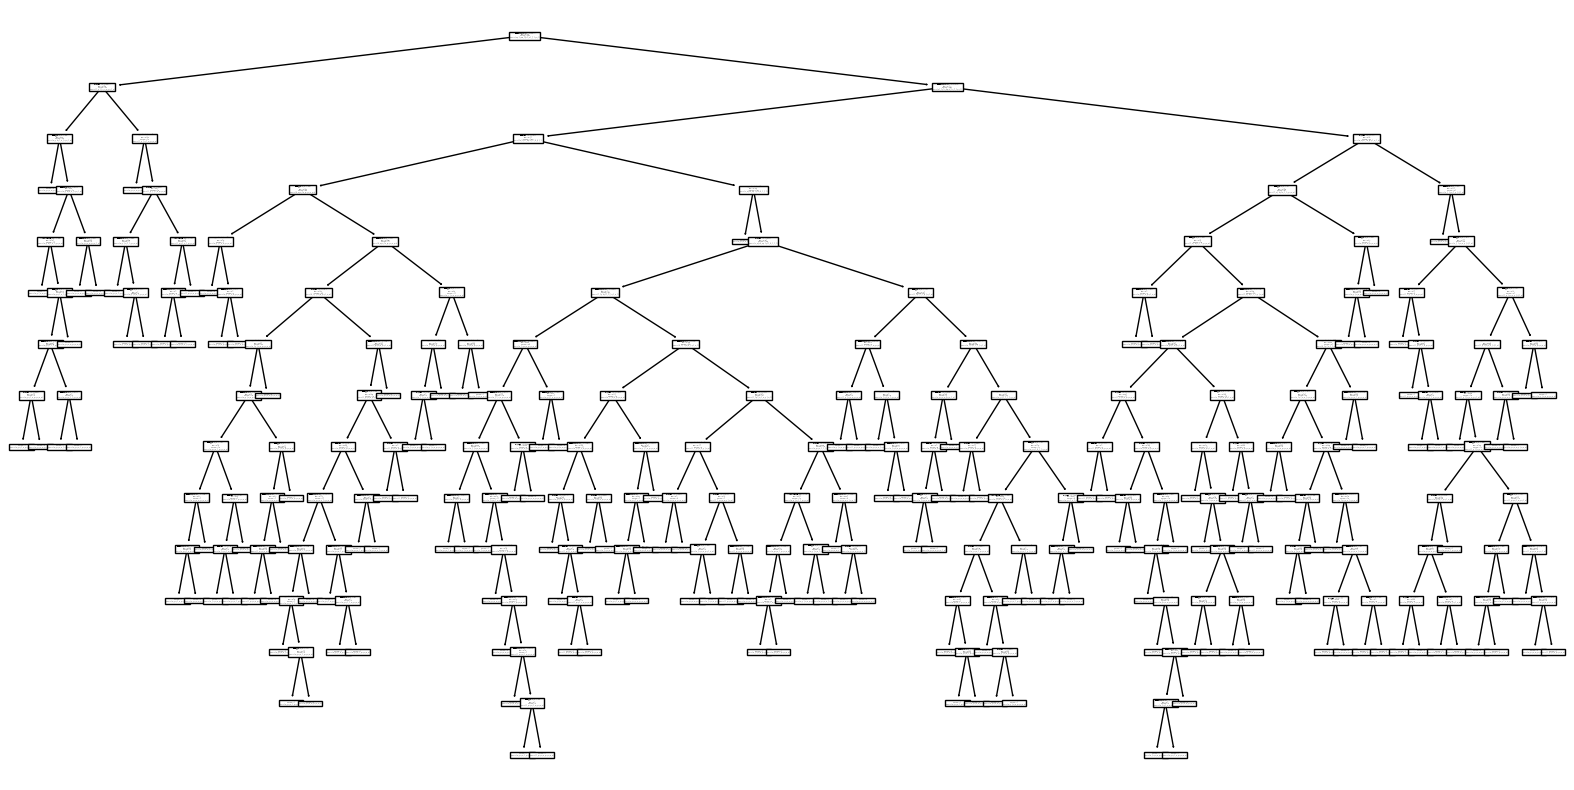

In [57]:
from sklearn.tree import plot_tree
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = feature_names)

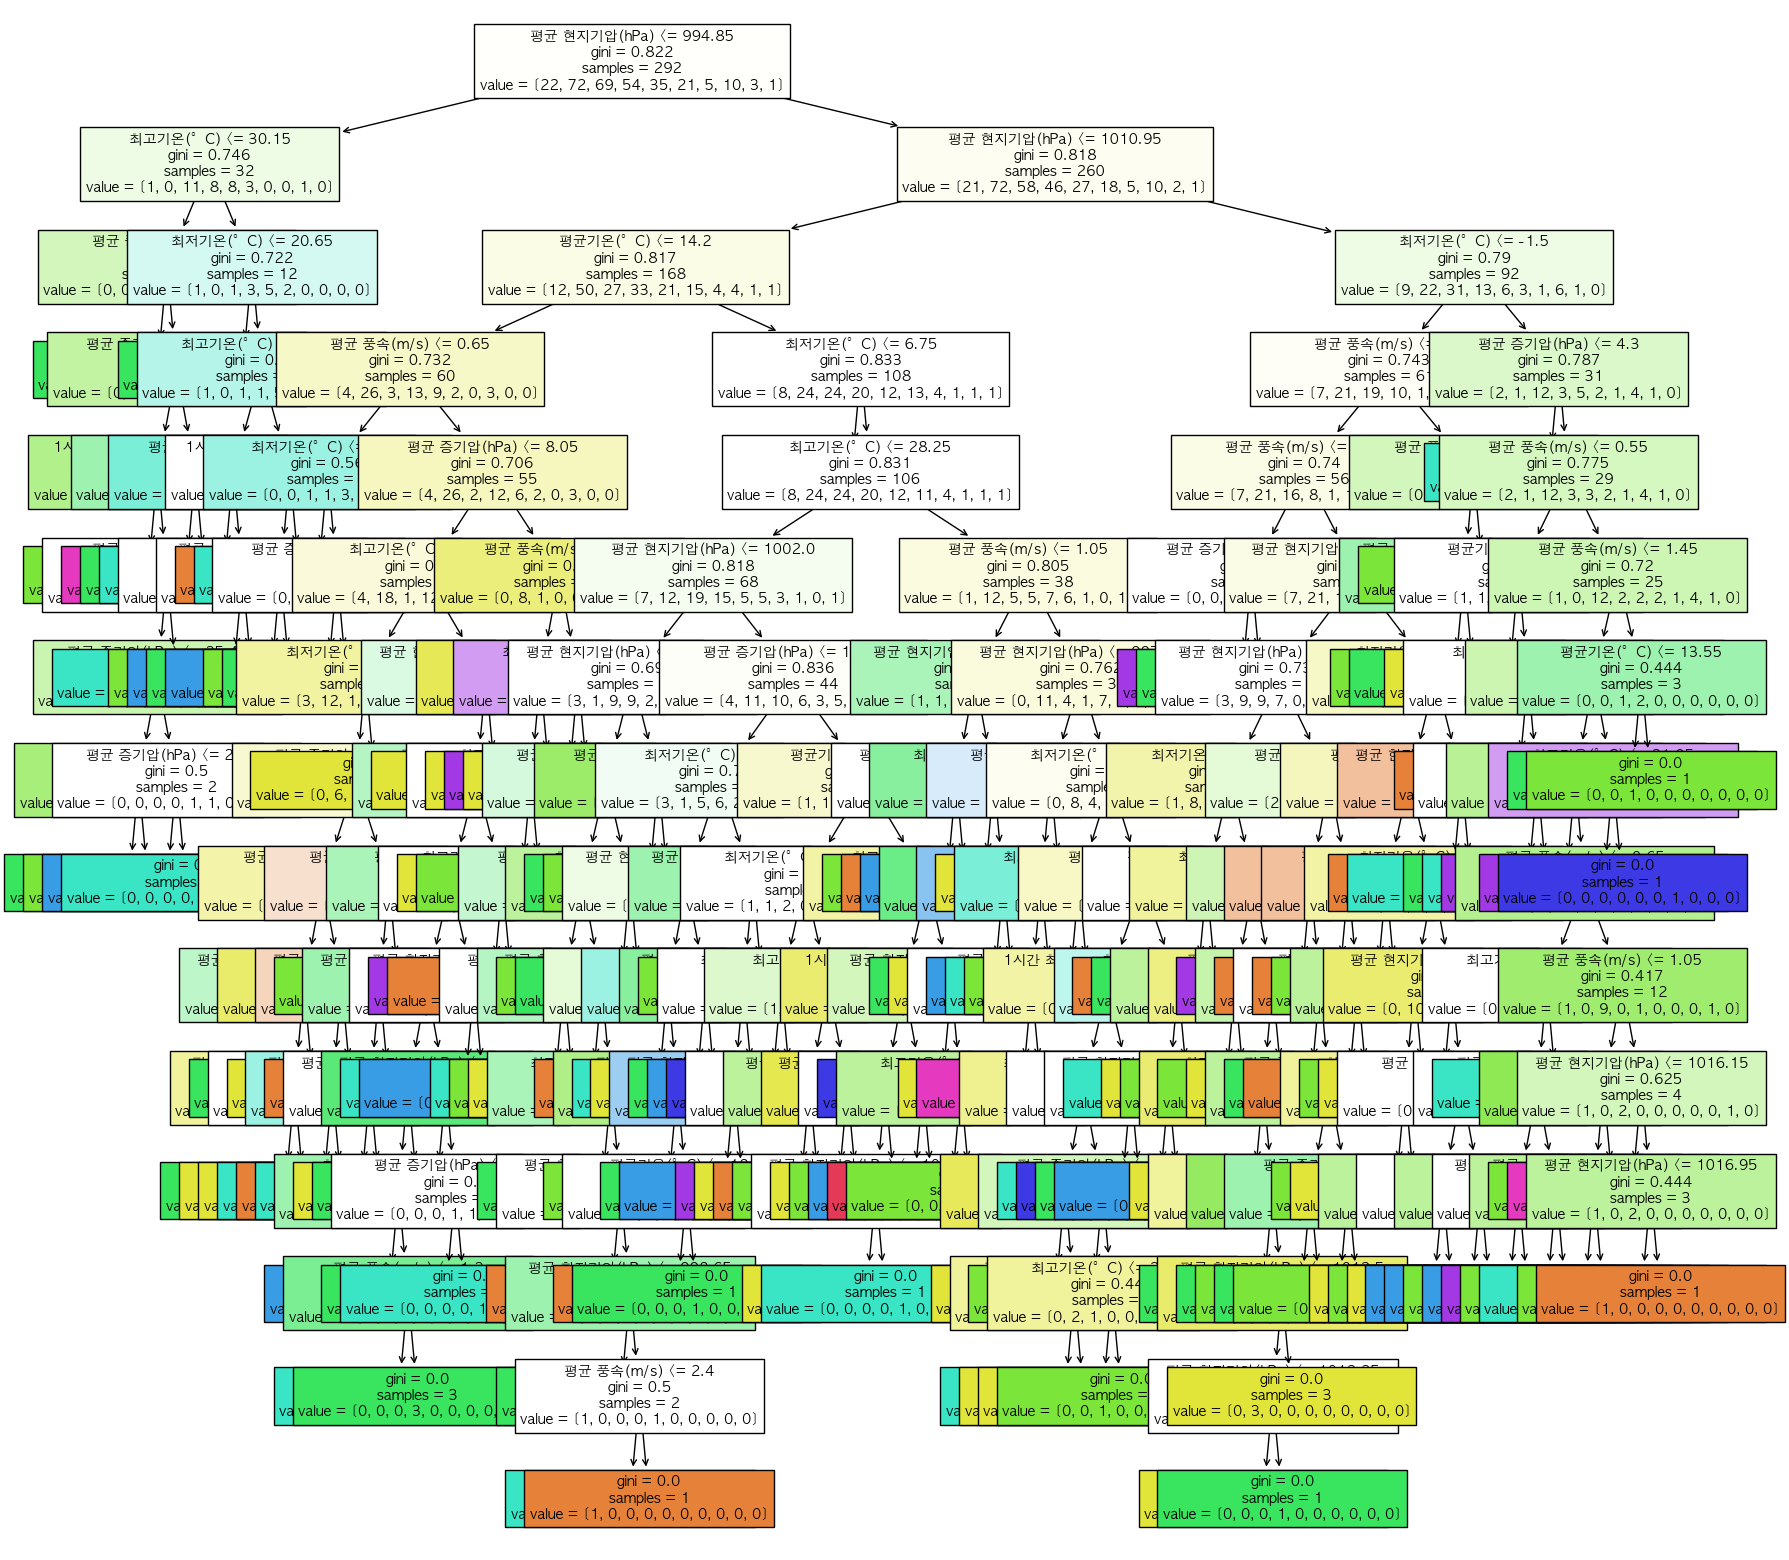

In [58]:
plt.figure(figsize = (20, 20))
tree = plot_tree(model, feature_names = feature_names, filled = True, fontsize = 10)

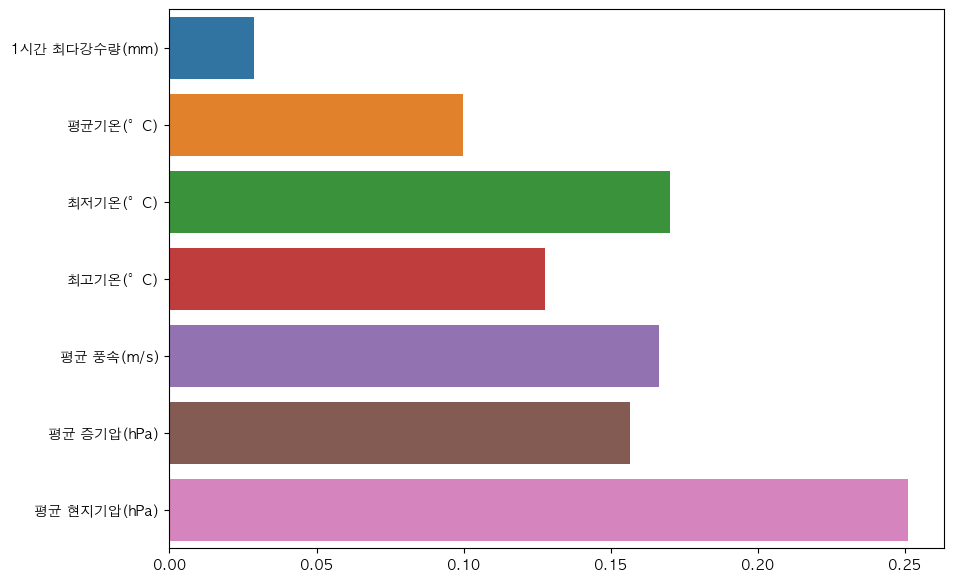

In [59]:
plt.figure(figsize = (10, 7))
sns.barplot(x = model.feature_importances_, y = feature_names)
plt.show()

In [60]:
diff_count = abs(y_test - y_pred).sum()
diff_count

129

In [61]:
#오차
abs(y_test-y_pred).sum() / len(y_test)

1.7671232876712328

In [65]:
# 정확도
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred

array([7, 1, 2, 3, 4, 2, 5, 1, 4, 3, 3, 4, 1, 1, 6, 1, 1, 4, 3, 4, 1, 2,
       3, 3, 1, 2, 1, 2, 5, 0, 4, 2, 1, 5, 1, 1, 1, 2, 2, 1, 1, 3, 1, 3,
       2, 3, 3, 1, 3, 2, 2, 3, 3, 1, 4, 3, 1, 2, 6, 2, 1, 1, 5, 5, 7, 9,
       3, 2, 2, 2, 7, 2, 4])

In [ ]:
#######

In [66]:
data

,일시,count,사고번호,사망자수,중상자수,경상자수,부상신고자수,사상자합계,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),평균 풍속(m/s),평균 증기압(hPa),평균 현지기압(hPa),일 최심적설(cm)
337,2022-01-01,0,0.000000e+00,0.0,0.0,0.0,0.0,0.0000,-5.1,-10.7,0.7,0.0,0.5,2.2,1019.7,0.0
0,2022-01-02,1,2.022010e+15,0.0,1.0,0.0,0.0,0.1168,-1.4,-8.0,6.3,0.0,1.0,3.3,1015.6,0.0
1,2022-01-03,2,4.044021e+15,0.0,0.0,2.0,0.0,0.0136,-2.1,-8.0,3.5,0.0,0.7,3.3,1015.2,0.0
338,2022-01-04,0,0.000000e+00,0.0,0.0,0.0,0.0,0.0000,-0.4,-4.7,4.5,0.0,1.5,2.7,1016.5,0.0
2,2022-01-05,2,4.044021e+15,0.0,0.0,2.0,0.0,0.0136,-2.6,-7.0,1.5,0.0,0.5,2.6,1016.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2022-12-27,3,6.066368e+15,0.0,0.0,0.0,3.0,0.0099,-2.9,-8.9,3.2,0.0,0.4,3.4,1018.2,0.0
333,2022-12-28,5,1.011061e+16,0.0,2.0,2.0,1.0,0.2505,-2.4,-5.5,2.8,0.0,1.2,3.3,1019.3,0.0
334,2022-12-29,2,4.044246e+15,0.0,1.0,2.0,0.0,0.1304,-3.5,-8.5,1.5,0.0,0.6,2.9,1021.7,0.0
335,2022-12-30,4,8.088492e+15,0.0,1.0,7.0,1.0,0.1677,-1.0,-3.9,3.0,0.0,1.0,3.7,1020.9,0.0


In [76]:
data.loc[data['사상자합계'] < 0.5 , '위험도'] = 0

In [77]:
data.loc[(0.5 < data['사상자합계']) & (data['사상자합계'] < 1) , '위험도'] = 1

In [78]:
data.loc[(1 < data['사상자합계']) & (data['사상자합계'] < 1.5) , '위험도'] = 2

In [79]:
data.loc[(1.5 < data['사상자합계']) & (data['사상자합계'] < 2) , '위험도'] = 3

In [80]:
data.loc[(2 < data['사상자합계']) & (data['사상자합계'] < 2.5) , '위험도'] = 4

In [81]:
data.loc[(2.5 < data['사상자합계']) & (data['사상자합계'] < 3) , '위험도'] = 5

In [111]:
data['위험도'].sort_values()


337    0.0
226    0.0
225    0.0
224    0.0
223    0.0
      ... 
220    2.0
105    2.0
91     2.0
175    2.0
137    4.0
Name: 위험도, Length: 365, dtype: float64

In [96]:
# 학습 및 예측
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

feature_names = ['1시간 최다강수량(mm)','평균기온(°C)','최저기온(°C)','최고기온(°C)','평균 풍속(m/s)','평균 증기압(hPa)','평균 현지기압(hPa)','count']
X=data[feature_names]
Y=data['위험도']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=777)


In [97]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model


DecisionTreeClassifier()

In [98]:
from time import time
start = time()
model.fit(X_train, y_train)
print('학습에 소요된 시간은 {}'.format(time() - start))

학습에 소요된 시간은 0.010107755661010742


In [99]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0., 0., 0., 2., 0.])

[Text(0.5357142857142857, 0.9583333333333334, 'count <= 6.5\ngini = 0.073\nsamples = 292\nvalue = [281, 1, 9, 1]'),
 Text(0.21428571428571427, 0.875, '평균 현지기압(hPa) <= 1004.15\ngini = 0.056\nsamples = 278\nvalue = [270, 1, 7, 0]'),
 Text(0.14285714285714285, 0.7916666666666666, 'gini = 0.0\nsamples = 110\nvalue = [110, 0, 0, 0]'),
 Text(0.2857142857142857, 0.7916666666666666, '평균 현지기압(hPa) <= 1004.25\ngini = 0.091\nsamples = 168\nvalue = [160, 1, 7, 0]'),
 Text(0.21428571428571427, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.35714285714285715, 0.7083333333333334, '최저기온(°C) <= 4.15\ngini = 0.081\nsamples = 167\nvalue = [160, 1, 6, 0]'),
 Text(0.21428571428571427, 0.625, '최고기온(°C) <= 2.95\ngini = 0.018\nsamples = 108\nvalue = [107, 0, 1, 0]'),
 Text(0.14285714285714285, 0.5416666666666666, '평균기온(°C) <= -0.15\ngini = 0.059\nsamples = 33\nvalue = [32, 0, 1, 0]'),
 Text(0.07142857142857142, 0.4583333333333333, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0, 0]

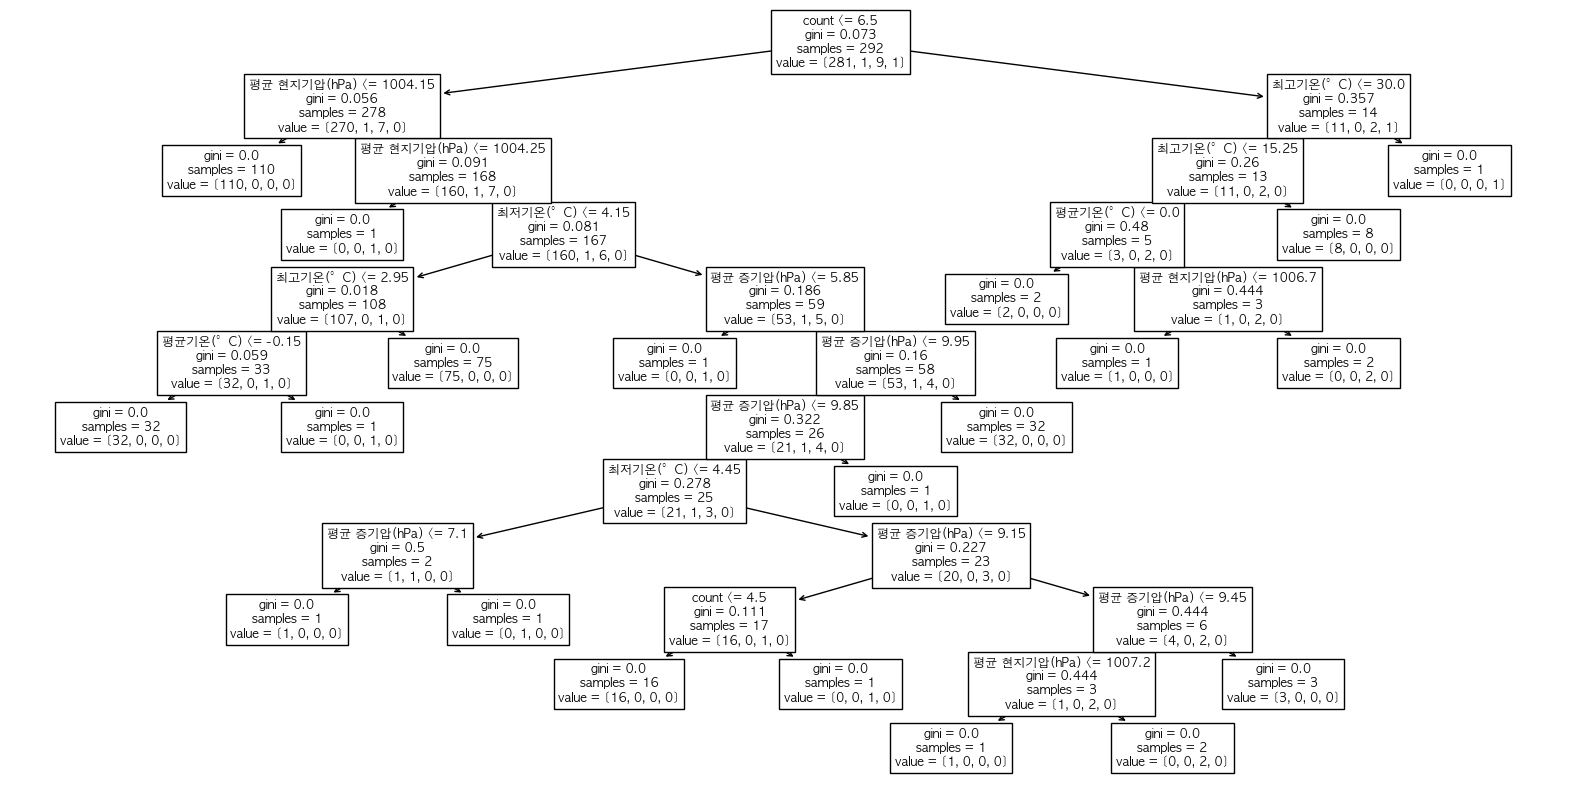

In [100]:
from sklearn.tree import plot_tree
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = feature_names)

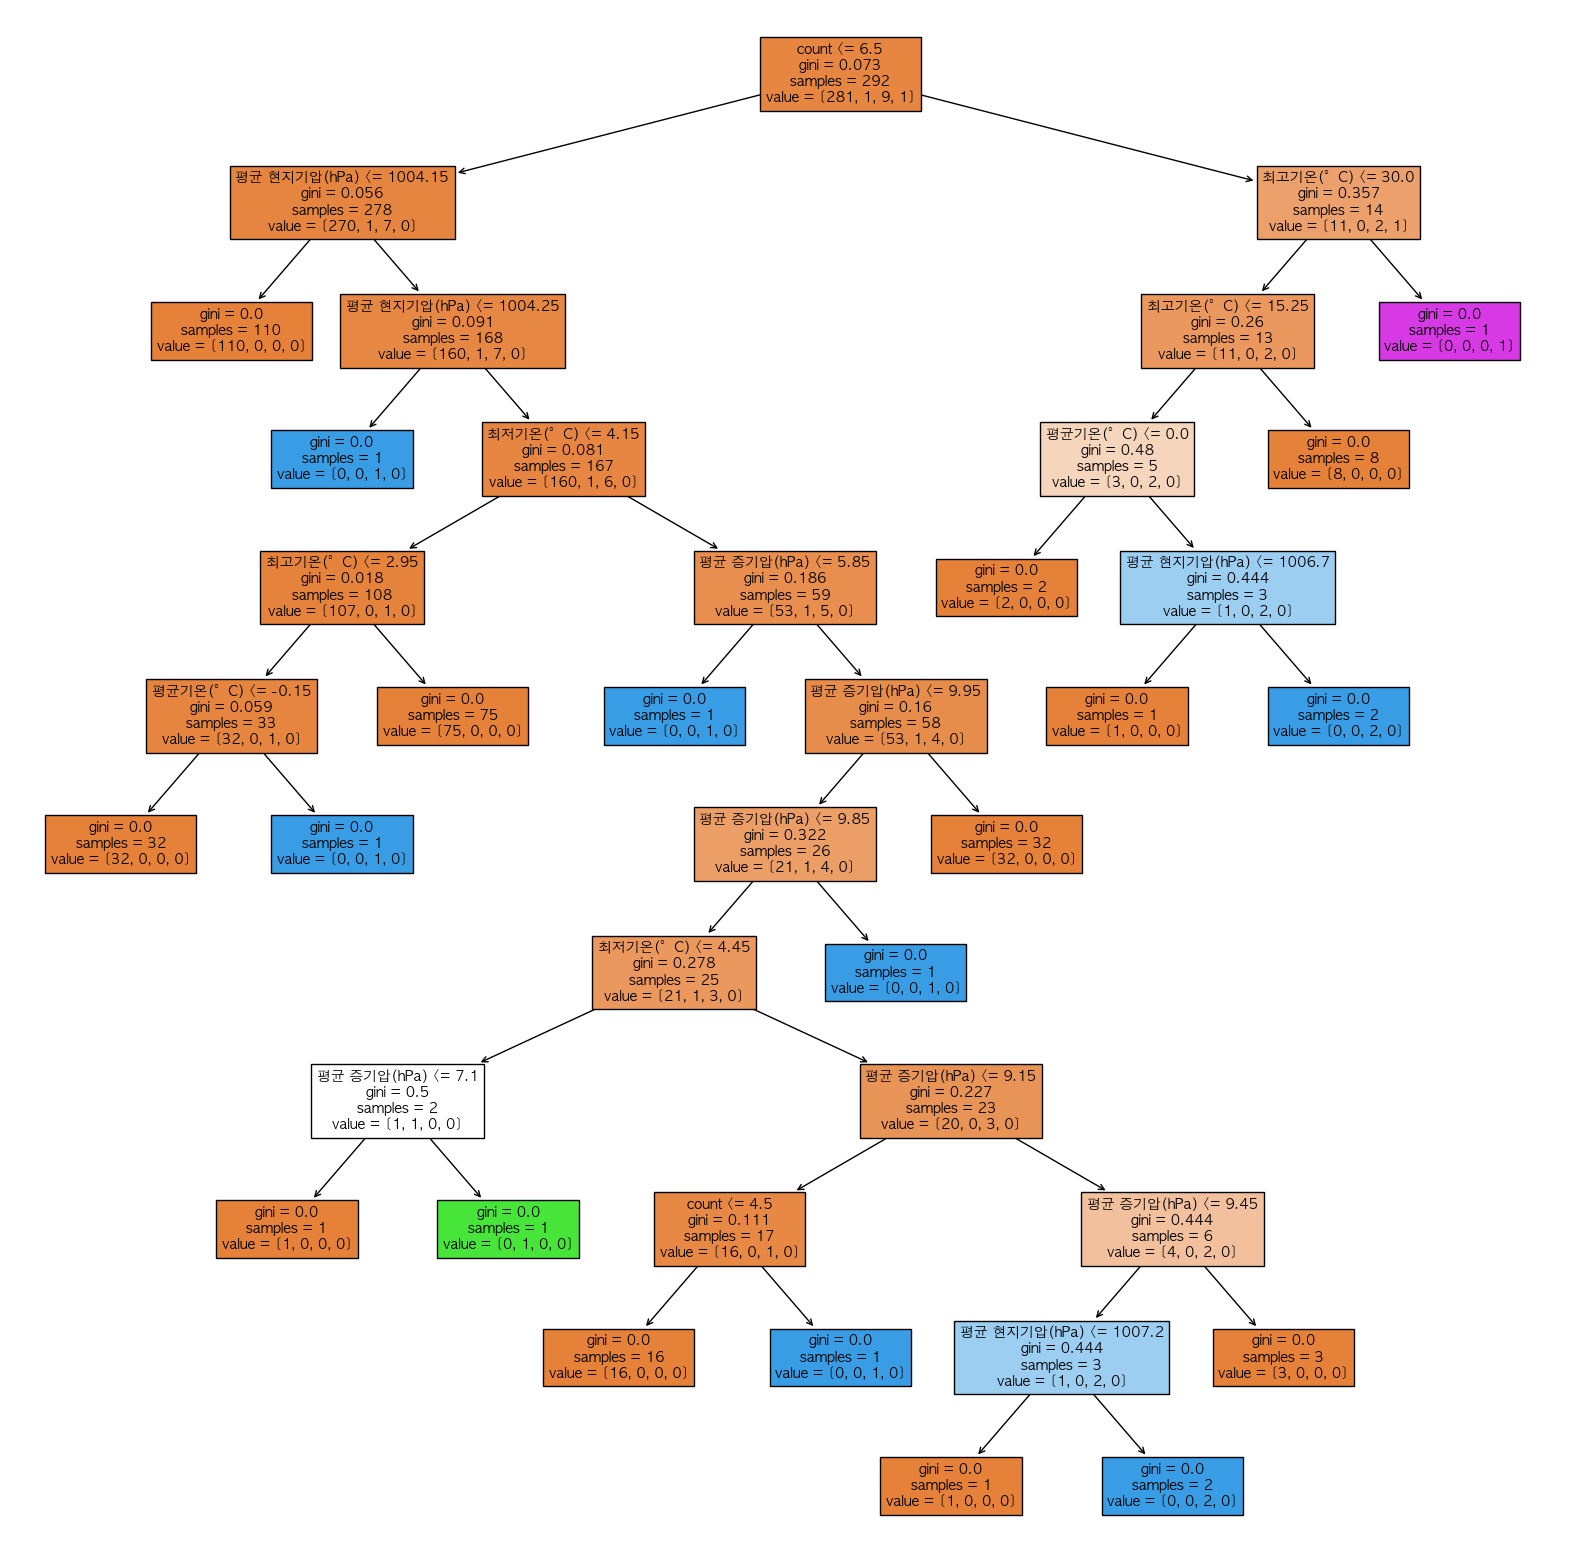

In [101]:
plt.figure(figsize = (20, 20))
tree = plot_tree(model, feature_names = feature_names, filled = True, fontsize = 10)

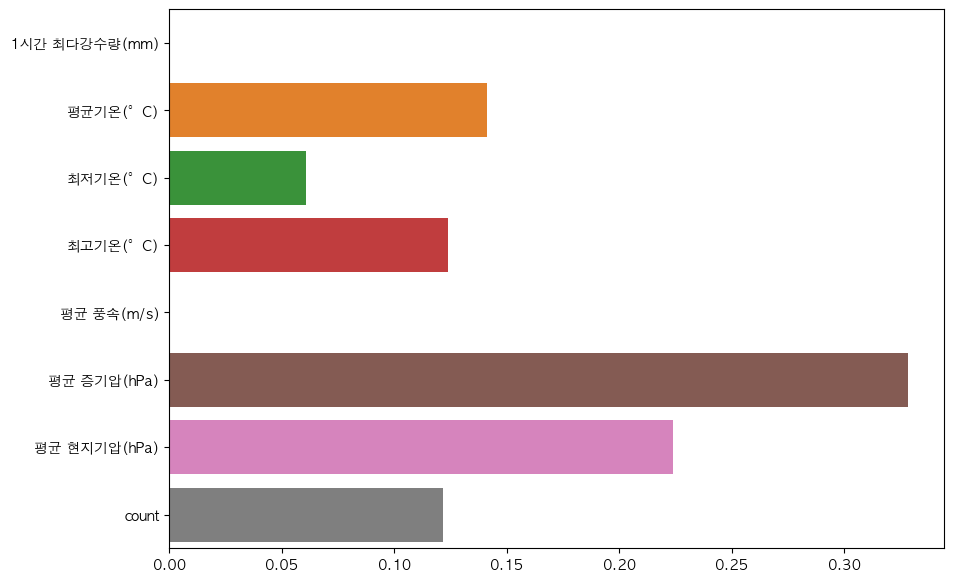

In [102]:
plt.figure(figsize = (10, 7))
sns.barplot(x = model.feature_importances_, y = feature_names)
plt.show()

In [103]:
#오차
abs(y_test-y_pred).sum() / len(y_test)

0.2191780821917808

In [104]:
#정확도
(len(y_test)-diff_count)/len(y_test)*100

-76.71232876712328

In [107]:
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_test}) 
comparison

,prediction,ground_truth
4,0.0,0.0
140,0.0,2.0
141,0.0,0.0
266,2.0,0.0
327,0.0,0.0
...,...,...
62,0.0,0.0
261,0.0,1.0
65,0.0,0.0
307,0.0,0.0
